 <div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 60%; padding: 5px">
  <h1 id="subtitle">Chapter 6: Pandas</h1>
  <h2 id="subtitle">Guillermo Avendaño Franco <br> Aldo Humberto Romero</h2>
  <br>
  <img src="fig/1-line logotype124-295.png" alt="Scientific Computing with Python" style="width:50%" align="left">
  </div>
  <div style="border: none; float: left; width: 30%; padding: 5px">
  <img src="fig/SCPython.png" alt="Scientific Computing with Python" style="width:100%">
  </div>
</div>

Adapted by **Guillermo Avendaño** (WVU), **Jose Rogan** (Universidad de Chile) and **Aldo Humberto Romero** (WVU) from the [Tutorials for Stanford cs228 and cs231n](https://github.com/kuleshov/cs228-material). A large parte of the info was also built from scratch. In turn, that material was adapted by [Volodymyr Kuleshov](http://web.stanford.edu/~kuleshov/) and [Isaac Caswell](https://symsys.stanford.edu/viewing/symsysaffiliate/21335) from the `CS231n` Python tutorial by Justin Johnson (http://cs231n.github.io/python-numpy-tutorial/).

Changes to the original tutorial include strict Python 3 formats and split of the material to fit a series of lessons on Python Programming for WVU's faculty and graduate students.

## Table of Contents

Python is a great general-purpose programming language on its own. This notebook is focused on Pandas. 
Pandas is a library specialized in Data Analysis.
The lesson is particularly oriented to Scientific Computing. 
Other episodes in the series include:

  * Python Syntax 
  * The Python Standard Library
  * Numpy
  * Matplotlib
  * Scipy
  * **Pandas \[This notebook\]**
  * Cython

After completing all the series in this lesson you will realize that python has become a powerful environment for scientific computing at several levels, from intereactive computing to scripting to big project developments.

## Setup

In [1]:
%load_ext watermark

In [2]:
%watermark

2019-08-08T18:19:49-04:00

CPython 3.5.2
IPython 7.7.0

compiler   : GCC 5.4.0 20160609
system     : Linux
release    : 4.15.0-55-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [3]:
import pandas
%watermark -iv

pandas 0.24.2



## Introduction

In this tutorial, we will cover:

* Create DataFrames directly and from several file formats
* Extract specific rows and columns

The purpose of this notebook is to show the basic elements that makes Pandas a very effective tool for data analysis.
In particular the focus will be on dealing with scientific data rather than a more broad "another dataset" approach 
from most tutorials of this kind.

**pandas** is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. 

**pandas** is a NumFOCUS sponsored project. It is a well stablished API and it is the foundation of several other packages used in data analysis, data mining and machine learning applications.

Pandas is one of them most often asked questions on Stack Overflow, in part due to its rising popularity but also due to the versatility in manipulating data.

<img src="fig/atlas_Sk4U7xecQ@2x.png" width=500px />

Pandas can be used also in scripts and bigger applications. However, it is easier to learn it from an interactive computing perspective. So we will use this notebook for that purpose.

We start loading pandas:

In [4]:
import os
import pandas as pd

The command above exposes all the funcionality of pandas under the `pd` namespace. This namespace is optional and its name arbitrary but with time it has been converted into *the-facto* usage.

Pandas deals with basically two kinds of data: Series and Dataframe. Series is just a collection of values like

In [5]:
fibo=pd.Series([1,1,2,3,5,8,13])

In [6]:
fibo

0     1
1     1
2     2
3     3
4     5
5     8
6    13
dtype: int64

Dataframes are basically tables, consider for example this table with the Boiling Points for common Liquids and Gases at Atmosferic pressure. Data from <https://www.engineeringtoolbox.com/boiling-points-fluids-gases-d_155.html>

| Product | Boiling Point (C) | Boiling Point (F) |
|:--------|:--------------|:----------------------|
|Acetylene 	|-84          | -119|
|Ammonia 	|-35.5  	  | -28.1|
|Ethanol 	| 78.4 	      | 173|
|Isopropyl Alchol |	80.3  |	177|
|Mercury 	| 356.9 	  | 675.1|
|Methane 	| -161.5 	  | -258.69|
|Methanol	| 66    	  | 151|
|Propane 	| -42.04 	  | -43.67|
|Sulfuric Acid 	| 330 	  | 626|
|Water 	    |100 	      | 212|

This table can be converted into a Pandas Dataframe using a python dictionary as entry.

In [7]:
temps={'F': [-84, -35.5, 78.4, 80.3, 356.9, -161.5, 66, -42.04, 330, 100], 
       'C':[-119,-28.1, 173, 177, 675.1, -258.69, 151, -43.67, 626, 212]}

In [8]:
pd.DataFrame(temps)

,C,F
0,-119.00,-84.00
1,-28.10,-35.50
2,173.00,78.40
3,177.00,80.30
4,675.10,356.90
5,-258.69,-161.50
6,151.00,66.00
7,-43.67,-42.04
8,626.00,330.00
9,212.00,100.00


**How did that work?**

Each *(key, value)* item in `temps` corresponds to a *column* in the resulting DataFrame.

The **Index** of this DataFrame was given to us on creation as the numbers 0-9.
To complete the table, lets add the names of the substances for which the boiling point was measured.

In [9]:
indices=['Acetylene', 'Ammonia', 'Ethanol', 'Isopropyl Alchol', 
         'Mercury', 'Methane', 'Methanol', 'Propane', 'Sulfuric Acid', 'Water']

In [10]:
boiling = pd.DataFrame(temps, index=indices)
boiling

,C,F
Acetylene,-119.00,-84.00
Ammonia,-28.10,-35.50
Ethanol,173.00,78.40
Isopropyl Alchol,177.00,80.30
Mercury,675.10,356.90
Methane,-258.69,-161.50
Methanol,151.00,66.00
Propane,-43.67,-42.04
Sulfuric Acid,626.00,330.00
Water,212.00,100.00


A pandas dataframe arrange data into columns and rows, each column has a tag and each row is identified with an index. If the index is not declared, a number will be used instead.

## Extracting columns and rows

Columns can be extracted using the name of the column, there are two ways of extracting them, as series or as another dataframe. As Series will be:

In [11]:
boiling['F']

Acetylene           -84.00
Ammonia             -35.50
Ethanol              78.40
Isopropyl Alchol     80.30
Mercury             356.90
Methane            -161.50
Methanol             66.00
Propane             -42.04
Sulfuric Acid       330.00
Water               100.00
Name: F, dtype: float64

In [12]:
type(_)

pandas.core.series.Series

As dataframe a double bracket is used

In [13]:
boiling[['F']]

,F
Acetylene,-84.00
Ammonia,-35.50
Ethanol,78.40
Isopropyl Alchol,80.30
Mercury,356.90
Methane,-161.50
Methanol,66.00
Propane,-42.04
Sulfuric Acid,330.00
Water,100.00


In [14]:
type(_)

pandas.core.frame.DataFrame

Rows are extracted with the method loc, for example:

In [15]:
boiling.loc['Water']

C    212.0
F    100.0
Name: Water, dtype: float64

In [16]:
type(_)

pandas.core.series.Series

The row can also be returned as a DataFrame using the double bracket notation.

In [17]:
boiling.loc[['Water']] 

,C,F
Water,212.0,100.0


There is another way of extract columns with a dot notation. It takes the flexibility of Python, pandas is also able to convert the columns as public attributes of the dataframe object. Consider this example:

In [18]:
boiling.C

Acetylene          -119.00
Ammonia             -28.10
Ethanol             173.00
Isopropyl Alchol    177.00
Mercury             675.10
Methane            -258.69
Methanol            151.00
Propane             -43.67
Sulfuric Acid       626.00
Water               212.00
Name: C, dtype: float64

In [19]:
type(_)

pandas.core.series.Series

The (dot) notation only works if the names of the columns have no spaces, otherwise only the bracket column extraction applies.

In [20]:
df=pd.DataFrame({'case one': [1], 'case two': [2]})

In [21]:
df['case one']

0    1
Name: case one, dtype: int64

The location and extraction methods in Pandas are far more elaborated than just the examples above. Most dataframes that are created in actual applications are not created from dictionaries but from actual files.

## Read data

It’s quite simple to load data from various file formats into a DataFrame. In the following examples we'll create dataframes from several usual formats.

### From CSV files

CSV stands for "comma-separated values". Its data fields are most often separated, or delimited, by a comma. For example, let's say you had a spreadsheet containing the following data.

CSV is a simple file format used to store tabular data, such as a spreadsheet or one table from a relational database. Files in the CSV format can be imported to and exported from programs that store data in tables, such as Microsoft Excel or OpenOffice Calc.

Being a text file, this format is not recommended when dealing with extremely large tables or more complex data structures, due to the natural limitations of the text format.

In [22]:
df = pd.read_csv('data/heart.csv')

This is a table downloaded from <https://www.kaggle.com/ronitf/heart-disease-uci>. The table contains a number of columns related to the presence of heart disease in a list of patients. In real applications tables can be extremely large to be seen complete. Pandas offers a few methods to get a quick overview of the contents of a DataFrame

In [23]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [24]:
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [25]:
df.shape

(303, 14)

In [26]:
df.size

4242

### From JSON Files

JSON (JavaScript Object Notation) is a lightweight data-interchange format. It is easy for humans to read and write. It is easy for machines to parse and generate. It is based on a subset of the JavaScript Programming Language, Standard ECMA-262 3rd Edition - December 1999. JSON is a text format that is completely language independent but uses conventions that are familiar to programmers of the C-family of languages, including C, C++, C#, Java, JavaScript, Perl, Python, and many others. These properties make JSON an ideal data-interchange language.

JSON is in particular appropiated for Data Analysis on Python as the JSON parser is part of the Standard Library and its format looks very similar to Python dictionaries. However, notice that a JSON file or JSON string is just that a set of bytes that can be readed as text. A python dictionary is a complete data structure. Other differences between JSON strings and dictionaries are:

 * Python's dictionary key can be any hash object, and JSON can only be a string.
 * The Python dict string can be created with single or double quotation marks, when represented on screen single quotes are used, however, a JSON string enforces double quotation marks.
 * You can nest tuple in Python dict. JSON can only use array.
 * JSON key name must be a string, Python dict uses hashable.
 
In practice that means that a JSON file can always be converted into a Python dictionary, but the reverse is not always true.

In [27]:
df=pd.read_json("data/heart.json")

### From SQLite Databases

SQLite is a C-language library that implements a small, fast, self-contained, high-reliability, full-featured, SQL database engine. SQLite is the most used database engine in the world. In practice SQLite is a serverless SQL database in a file.

In [28]:
import sqlite3

In [29]:
con = sqlite3.connect("data/heart.db")

In [30]:
df = pd.read_sql_query("SELECT * FROM heart", con)

In [31]:
df.head()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### From Excel files

Pandas also support reading Excel files, however, in order to read files from recent versions of Excel. You need to install the **xlrd** package 

In [32]:
#pip install xlrd

If you are using conda, the package can be installed with:

In [33]:
#conda install xlrd

After the package has been installed, pandas is able to read the Excel files version >= 2.0

In [34]:
df=pd.read_excel('data/2018_all_indicators.xlsx')

### From other formats

Pandas is very versatil in accepting a variety of formats: STATA, SAS, HDF5 files. See <https://pandas.pydata.org/pandas-docs/stable/reference/io.html> for more information on the multiple formats supported.

## Write DataFrames

Pandas also offers the ability to store resulting DataFrames back into several formats. Consider this example:
    

In [35]:
heart = pd.read_csv('data/heart.csv')

Saving the dataframe in those formats execute:

In [36]:
if os.path.isfile("new_heart.db"):
    os.remove("new_heart.db")

heart.to_csv('new_heart.csv')

heart.to_json('new_heart.json')

con = sqlite3.connect("new_heart.db")
heart.to_sql('heart', con)

os.remove("new_heart.csv")
os.remove("new_heart.json")
os.remove("new_heart.db")

## View the data

We already saw how to use **tail** and **head** to get a glipmse into the initial and final rows. The default is 5 rows, but the value can be modified.

In [37]:
heart.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [38]:
heart.tail(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


Another method is **info** to see the columns and the type of values stored on them. In general Pandas tries to associate an numerical value when possible. However, it will revert into datatype **object** when mixed values are found.

In [39]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In this particular case the table is rather clean, with all columns populated. It is often the case where some columns have missing data, we will deal with them in another example.

## Checking and removing duplicates

Another important check to perform on DataFrames is search for duplicated rows. Lets continue using the 'hearth' dataFrame and search duplicated rows.

In [40]:
heart.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
273    False
274    False
275    False
276    False
277    False
278    False
279    False
280    False
281    False
282    False
283    False
284    False
285    False
286    False
287    False
288    False
289    False
290    False
291    False
292    False
293    False
294    False
295    False
296    False
297    False
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

The answer is a pandas series indicating if the row is duplicated or not. Lets see the duplicates:

In [41]:
heart[heart.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


Two contiguous rows are identical. Most likely a human mistake entering the values. We can create a new DataFrame with one of those rows removed

In [42]:
heart_nodup = heart.drop_duplicates()

heart_nodup.shape

(302, 14)

Compare with the original DataFrame:

In [43]:
heart.shape

(303, 14)

## Plotting

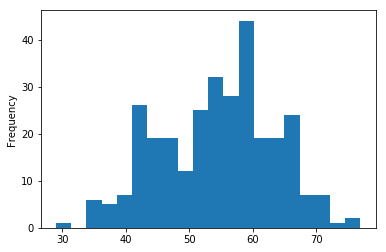

In [57]:
%matplotlib inline
heart['age'].plot.hist(bins=20);

In [58]:
import seaborn as sns

In [102]:
h4=heart[['age', 'trestbps', 'chol', 'thalach']]
goal=[ 'no heart disease' if x==1 else 'heart disease' for x in heart['target'] ]
h5=h4.join(pd.DataFrame(goal, columns=['goal']))

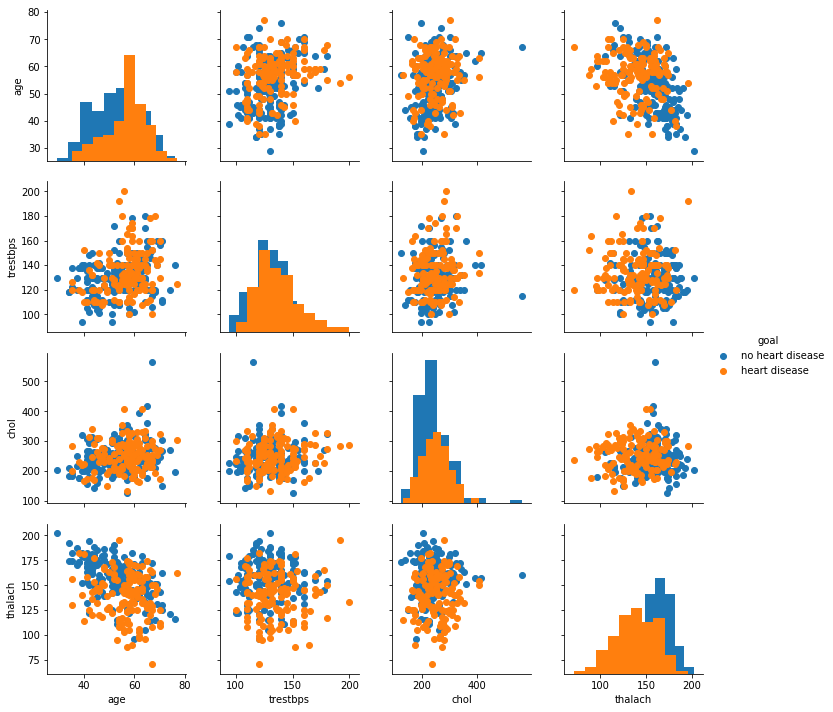

In [103]:
import matplotlib.pyplot as plt

g = sns.PairGrid(h5, hue="goal")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();